Raul Jimenez - 19017,
Bryann Alfaro - 19372, 
Donaldo Garcia - 19683,
Oscar Saravia - 19322,
Diego Arredondo - 19422

# Proyecto de deteccion de malware en archivos PE

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\raula\Documents\RAUL_ANGEL\UVG_COMPU\NOVENO_SEMESTRE\SECURITY-DATA-SCIENCE\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\raula\AppData\Local\Temp\ipykernel_20128\3209144236.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head()

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [4]:
test.head()

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,Skype-8.10.0.9.exe,23117,80,2,0,4,15,65535,0,184,...,3221225536,0,11,122,0,0,102400,114688,0,53905336
1,vlc-3.0.2-win64.exe,23117,144,3,0,4,0,65535,0,184,...,3227517056,0,7,165,0,0,208896,430080,0,40201272
2,stinger32.exe,23117,64,1,0,2,0,65535,0,184,...,3758096608,0,1,2,7,36339712,36339976,36343808,0,16478208
3,SpotifyFullSetup.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,8,159,0,0,634448,679936,0,63220064
4,uftp_english.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,4,92,0,0,38620,49152,0,35544576


In [5]:
# turn to lower case all the columns names
train.columns = map(str.lower, train.columns)
test.columns = map(str.lower, test.columns)

## Remove na

In [6]:
train.dropna(inplace=True)
test.dropna(inplace=True)
train.shape

(19611, 79)

## Profiling

In [7]:

report = pandas_profiling.ProfileReport(train)
report.to_file("malware_PE_profiler.html")

## Select features to use

In [8]:
# show the correlation matrix of the train data
corr = train.corr()
corr['malware'].sort_values(ascending=False).head(15)

C:\Users\raula\AppData\Local\Temp\ipykernel_20128\2973250564.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


malware                      1.000000
sectionmaxchar               0.393282
sizeofstackreserve           0.251791
suspiciousimportfunctions    0.216656
dllcharacteristics           0.197023
e_maxalloc                   0.186079
filealignment                0.172926
minorlinkerversion           0.145848
checksum                     0.135325
numberofsections             0.109373
sectionslength               0.109309
sizeofheapreserve            0.084892
e_lfanew                     0.074879
suspiciousnamesection        0.058088
sectionmaxpointerdata        0.045360
Name: malware, dtype: float64

In [9]:
train_clean = train[['malware', 'sectionmaxchar', 'sizeofstackreserve','suspiciousimportfunctions','filealignment','dllcharacteristics','minorlinkerversion','checksum','sizeofheapreserve','e_maxalloc','numberofsections','sectionslength','e_lfanew','suspiciousnamesection','e_oeminfo']]

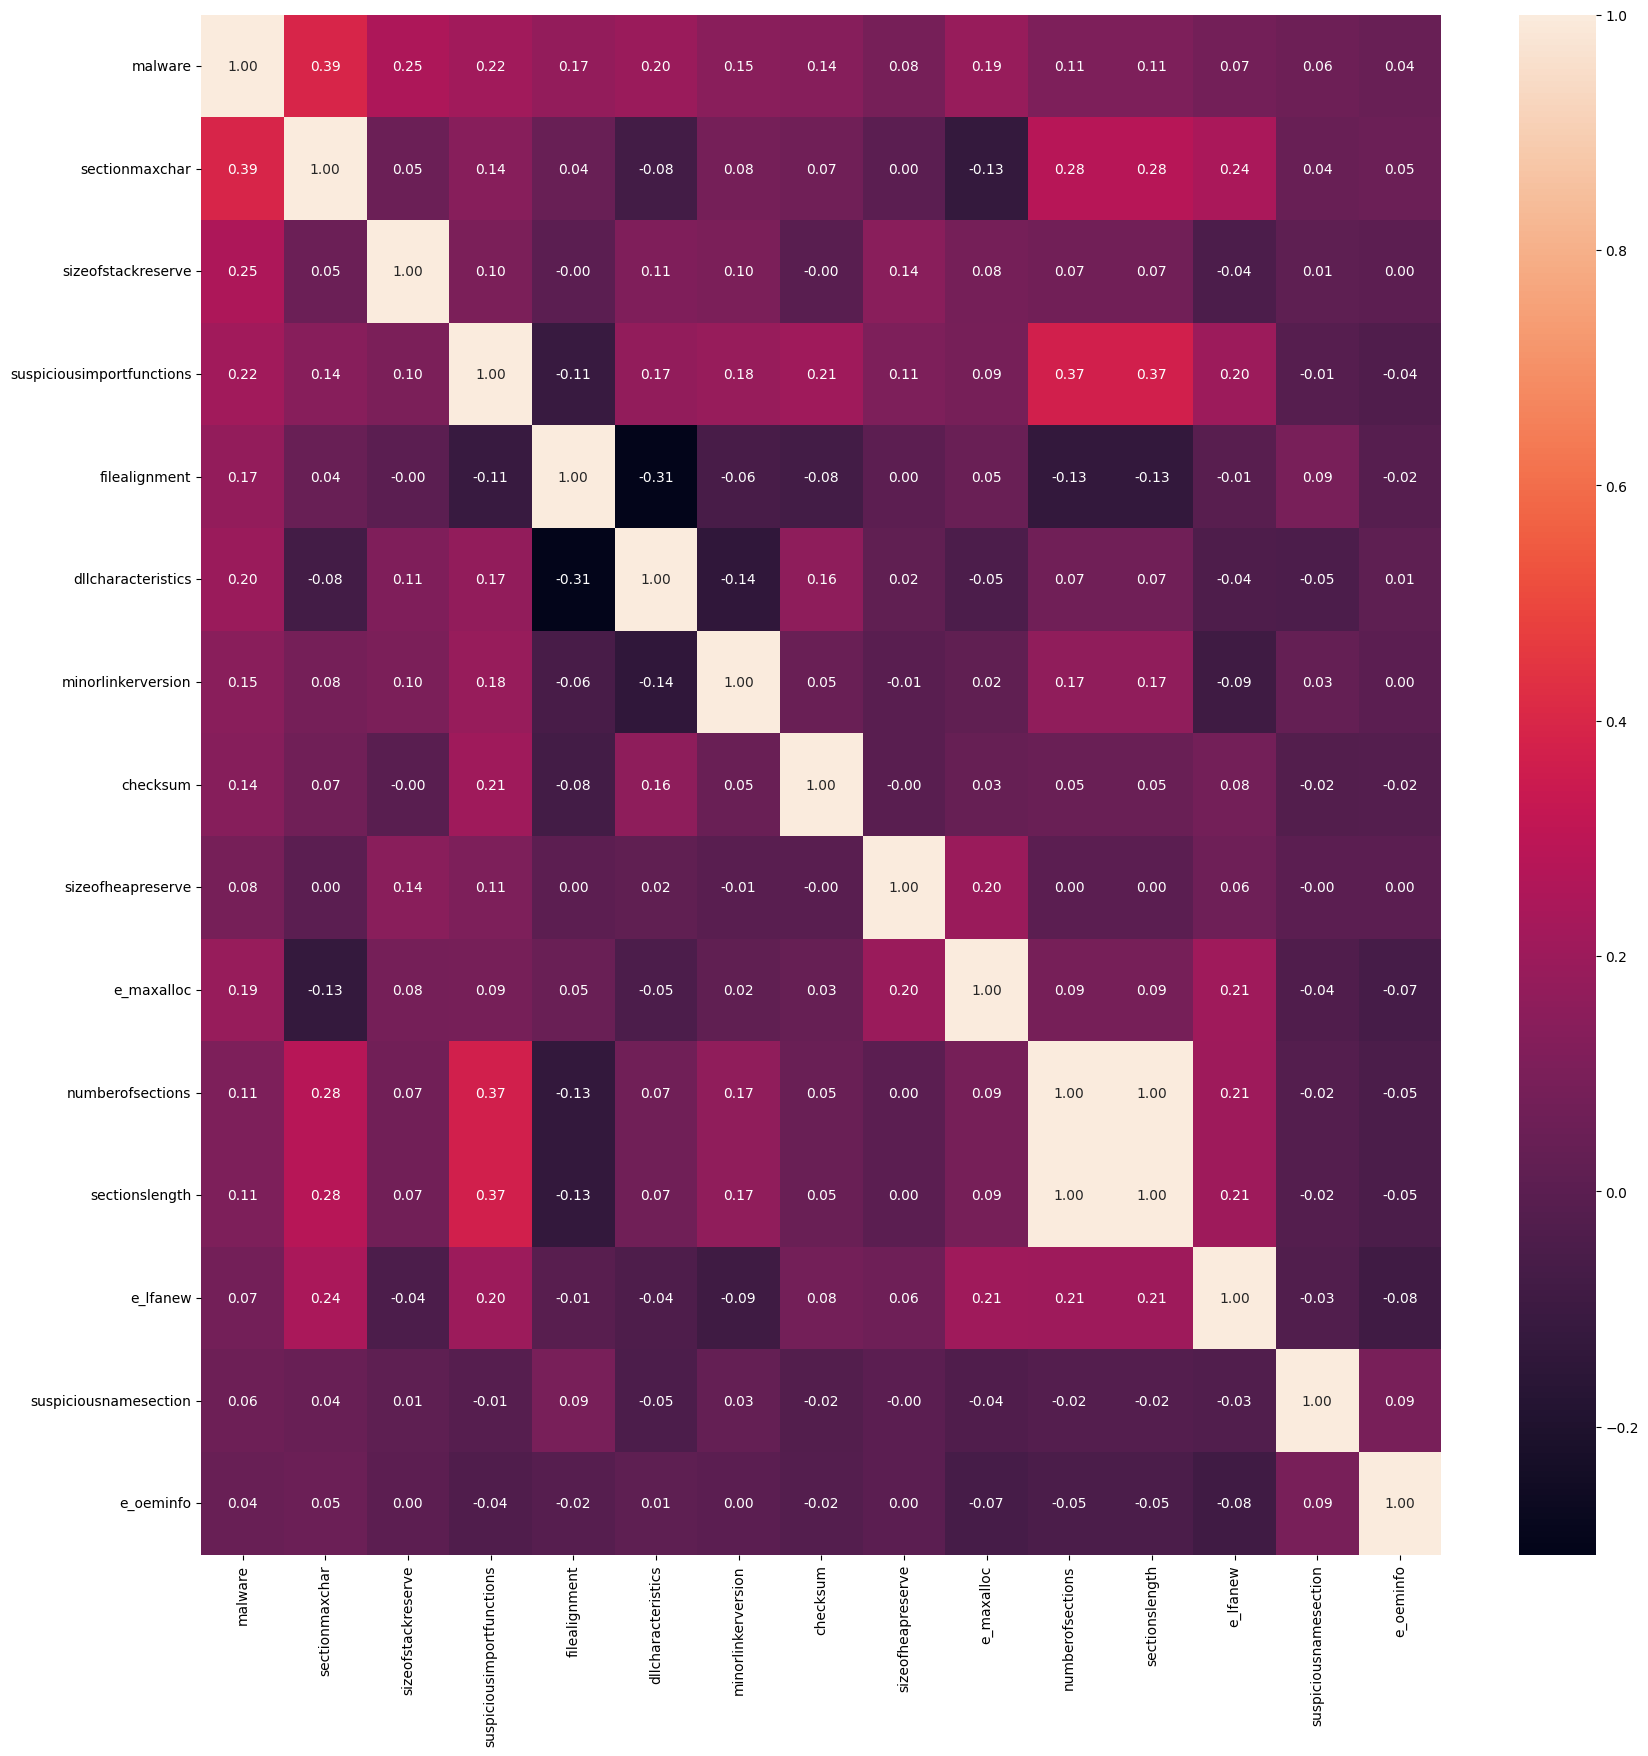

In [10]:
# show the heatmap of the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(train_clean.corr(), annot=True, fmt=".2f")
plt.show()

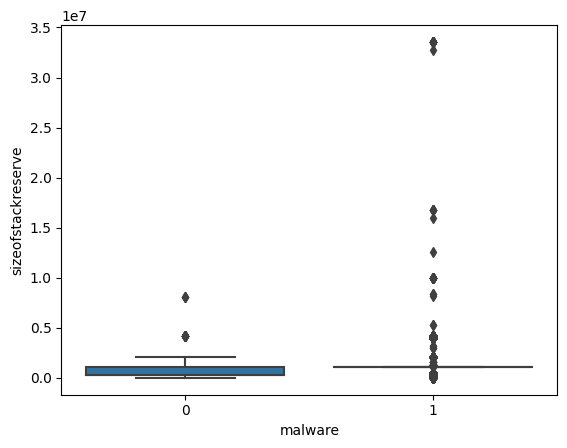

In [11]:
# show a box and whisker plot of the malware column and the sizeofstackreserve column
sns.boxplot(x='malware', y='sizeofstackreserve', data=train_clean)
plt.show()

In [12]:
# remove all the rows that has values over 1.0 in the sizeofstackreserve column
train_clean = train_clean[train_clean['sizeofstackreserve'] < 1.0]

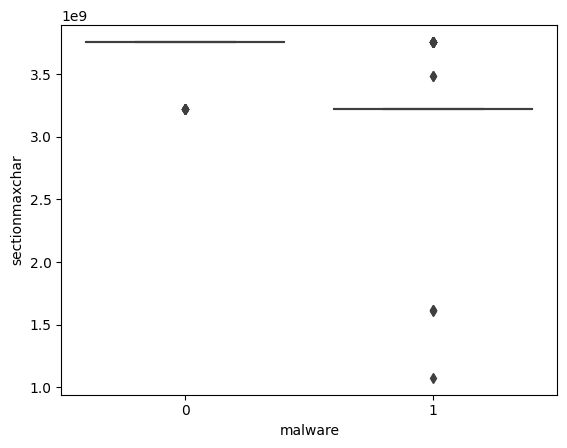

In [13]:
# show a box and whisker plot of the malware column and the sectionmaxchar column
sns.boxplot(x='malware', y='sectionmaxchar', data=train_clean)
plt.show()

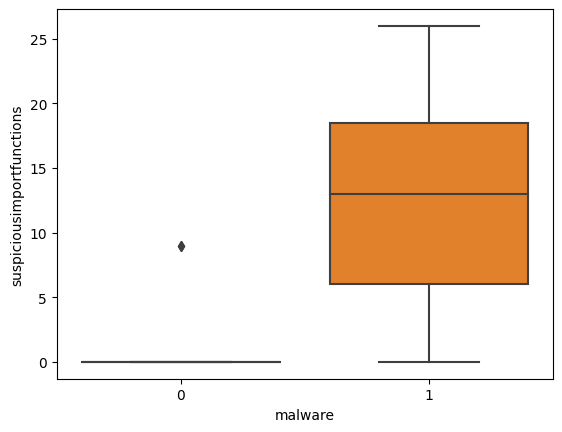

In [18]:
# show a box and whisker plot of the malware column and the suspiciousimportfunctions column
sns.boxplot(x='malware', y='suspiciousimportfunctions', data=train_clean)
plt.show()

## Balance data

In [16]:
# show balance of the data using the malware column
train['malware'].value_counts()

1    14599
0     5012
Name: malware, dtype: int64

In [17]:
# Remove some of the rows that has value "1" in the malware column to balance the data
train = train[train['malware'] == 0].sample(5012).append(train[train['malware'] == 1].sample(5012))
train['malware'].value_counts()

C:\Users\raula\AppData\Local\Temp\ipykernel_20128\967369620.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train[train['malware'] == 0].sample(5012).append(train[train['malware'] == 1].sample(5012))


0    5012
1    5012
Name: malware, dtype: int64